## Overview

The task in this assignment is to perform a statistical analysis of the given dataset, using Jupyter Notebook.

The data to be analyzed concerns snails called abalones. The dataset comprises 9 variables (attributes, features) of these snails and contains 4177 observations. One of the variables is qualitative (sex), whereas the others are quantitative.

The analysis should be performed using Jupyter Notebook and documented as a Jupyter notebook.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1. Using the Pandas package, create a table of the distribution of the qualitative variable in the dataset, which should have the following structure:
- rows should represent individual categories;
- columns:
    - category name,
    - count,
    - percentage (rounded to two decimal places).ces).

In [32]:
#(U10-string,f7-float,i4-int)
dtype = [
    ('sex'),
    ('length'),
    ('diameter'),
    ('height'),
    ('whole_weight'),
    ('shucked_weight'),
    ('viscera_weight'),
    ('shell_weight'),
    ('rings')
]
data = pd.read_csv("data.csv", sep=',', names=dtype)

quantitative_variables = [
    'length',
    'diameter',
    'height',
    'whole_weight',
    'shucked_weight',
    'viscera_weight',
    'shell_weight',
    'rings'
]

# Quantity counting of 'M','F','I' in 'sex'
count_m = (data['sex'] == 'M').sum()
count_i = (data['sex'] == 'I').sum()
count_f = (data['sex'] == 'F').sum()
# total count
total_count = count_m + count_f + count_i
#Calculation of percentages
percent_m = (count_m / total_count) * 100
percent_i = (count_i / total_count) * 100
percent_f = (count_f / total_count) * 100
# table modeling
b = {'count': [count_m, count_i, count_f], 
     '%': [round(percent_m, 2), round(percent_i, 2), round(percent_f, 2)]}
df_b = pd.DataFrame(b)
df_b.index = ['Male', 'Infant', 'Female']
df_b


,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


2. Using the Pandas package, create a table with summary statistics for the quantitative variables in the dataset, which should have the following structure:
- rows should represent individual variables;
- columns:
    - variable name,
    - arithmetic mean,
    - standard deviation,
    - minimum value,
    - 1st quartile,
    - 2nd quartile (median),
    - 3rd quartile,
    - maximum value.mum value.

In [29]:
summary_stats = []

# iterate through quantitative variables and calculate statistics
for variable in quantitative_variables:
    stats = [
        round(data[variable].mean(), 4),
        round(data[variable].std(), 4),
        round(data[variable].min(), 4),
        round(data[variable].quantile(0.25), 4),
        round(data[variable].quantile(0.5), 4),
        round(data[variable].quantile(0.75), 4),
        round(data[variable].max(), 4)
    ]
    
    summary_stats.append(stats)
df_summary = pd.DataFrame(summary_stats, columns=[
    'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
df_summary.index = ['Length', 'Diameter', 'Height', 'Whole weight', 
                    'Shucked weight', 'Viscera weight', 'Shell weight', 
                    'Rings']

df_summary

,mean,std,min,25%,50%,75%,max
Length,0.5240,0.1201,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,0.4079,0.0992,0.0550,0.3500,0.4250,0.480,0.6500
Height,0.1395,0.0418,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,0.8287,0.4904,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,0.3594,0.2220,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,0.1806,0.1096,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,0.2388,0.1392,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.9337,3.2242,1.0000,8.0000,9.0000,11.000,29.0000


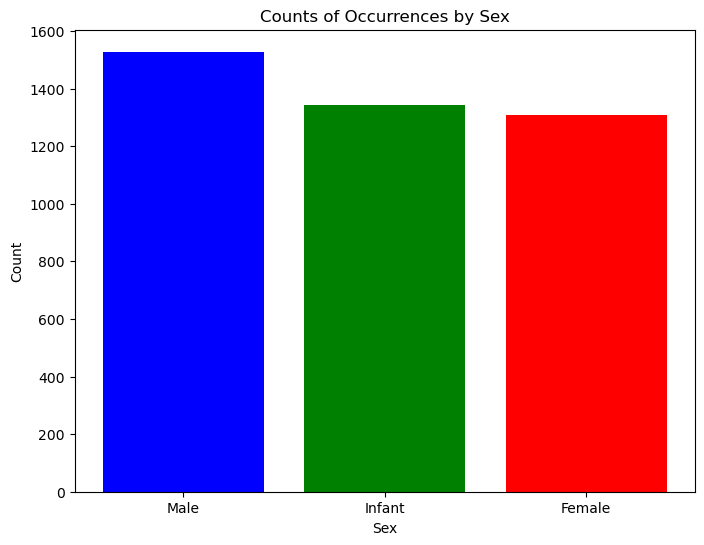

In [5]:
counts = df_b['count']
categories = df_b.index

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green', 'red'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Counts of Occurrences by Sex')
plt.show();


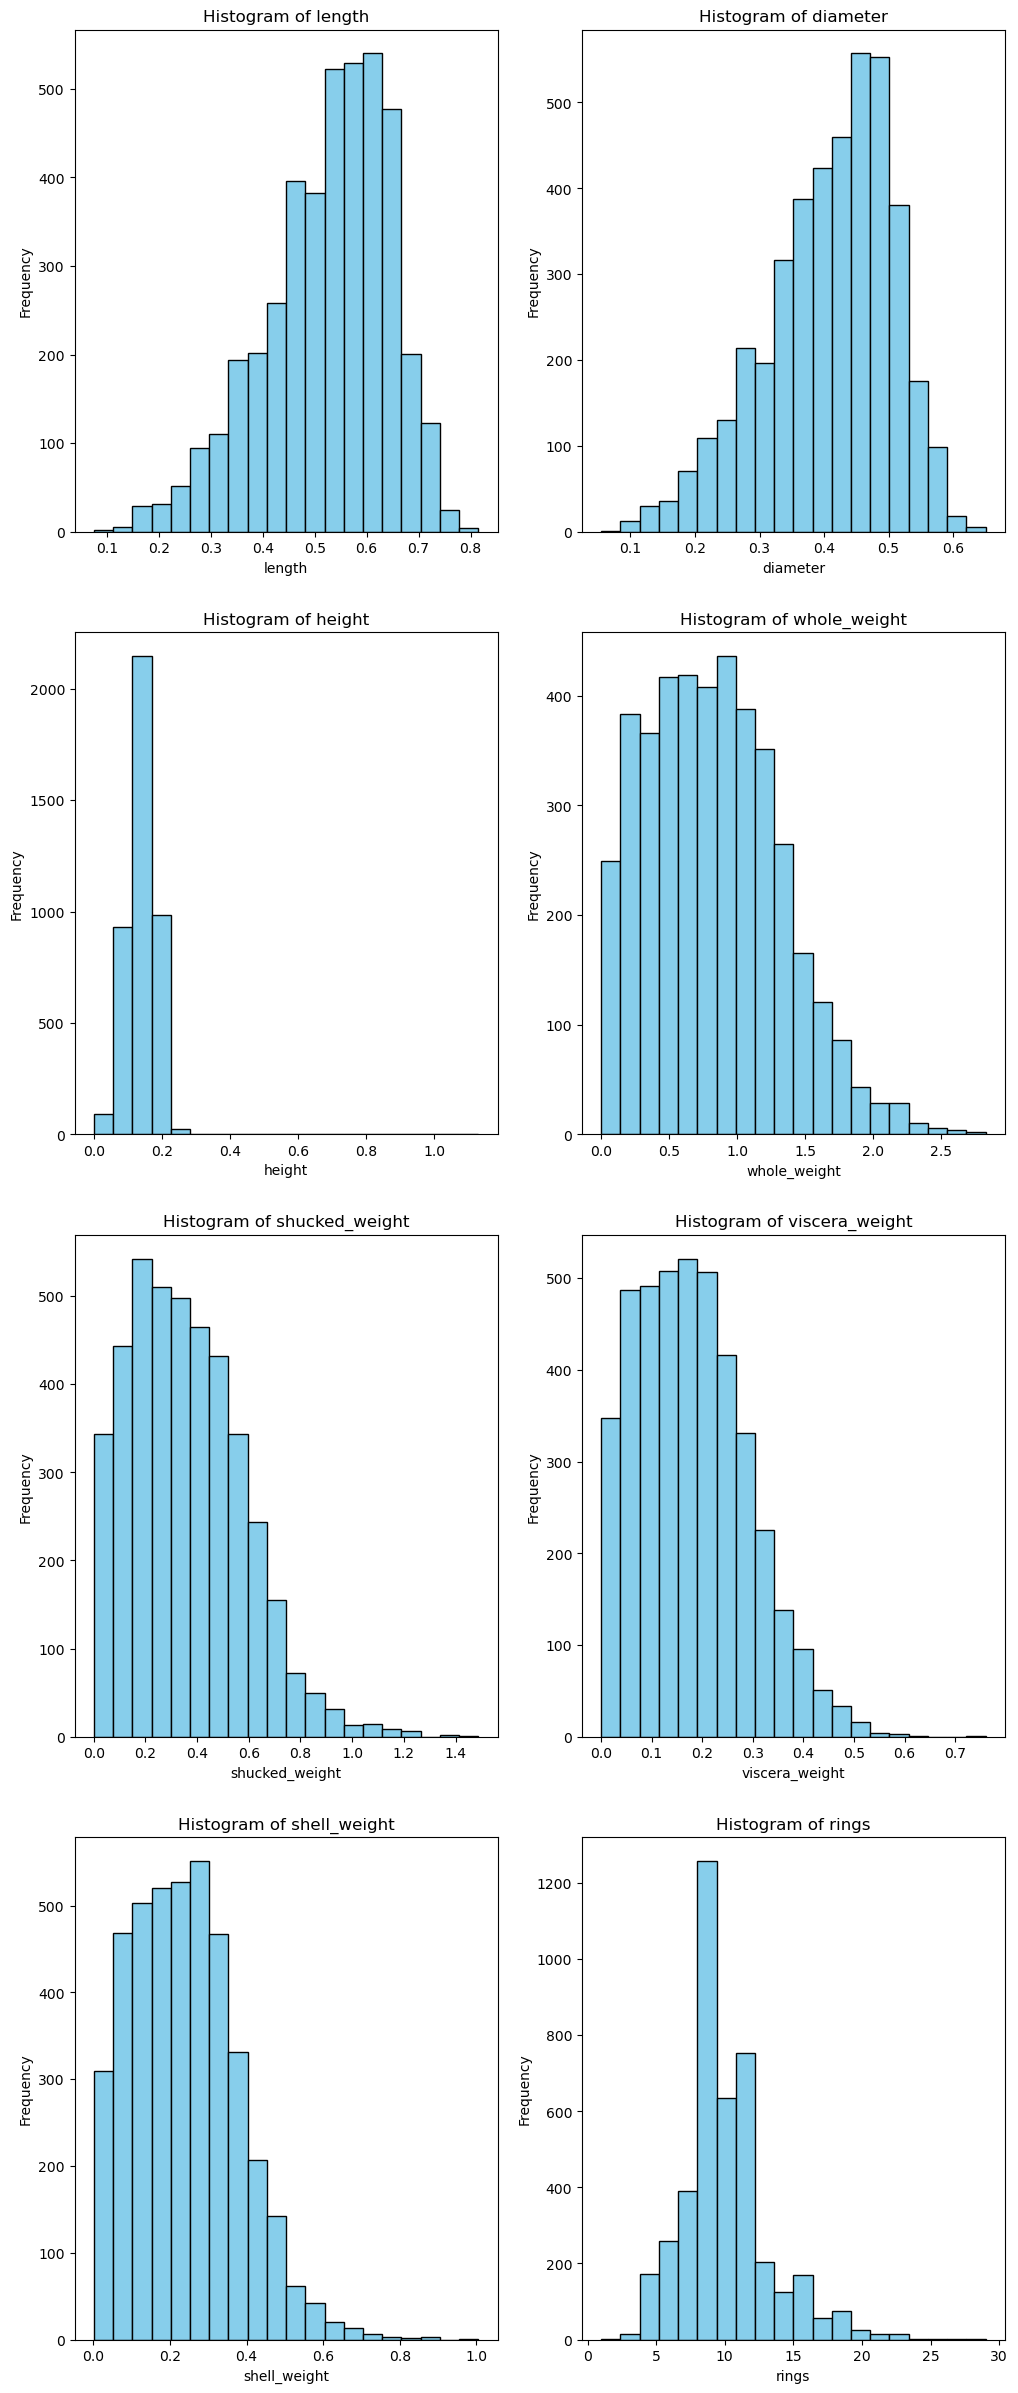

In [6]:
# Creating subplots (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(12, 30))

# Iterate through quantitative variables and create histograms
for i, variable in enumerate(quantitative_variables):
    row = i // 2
    col = i % 2
    axes[row, col].hist(data[variable], bins=20, color='skyblue',
                        edgecolor='black')
    axes[row, col].set_title(f'Histogram of {variable}')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Frequency')

plt.show()


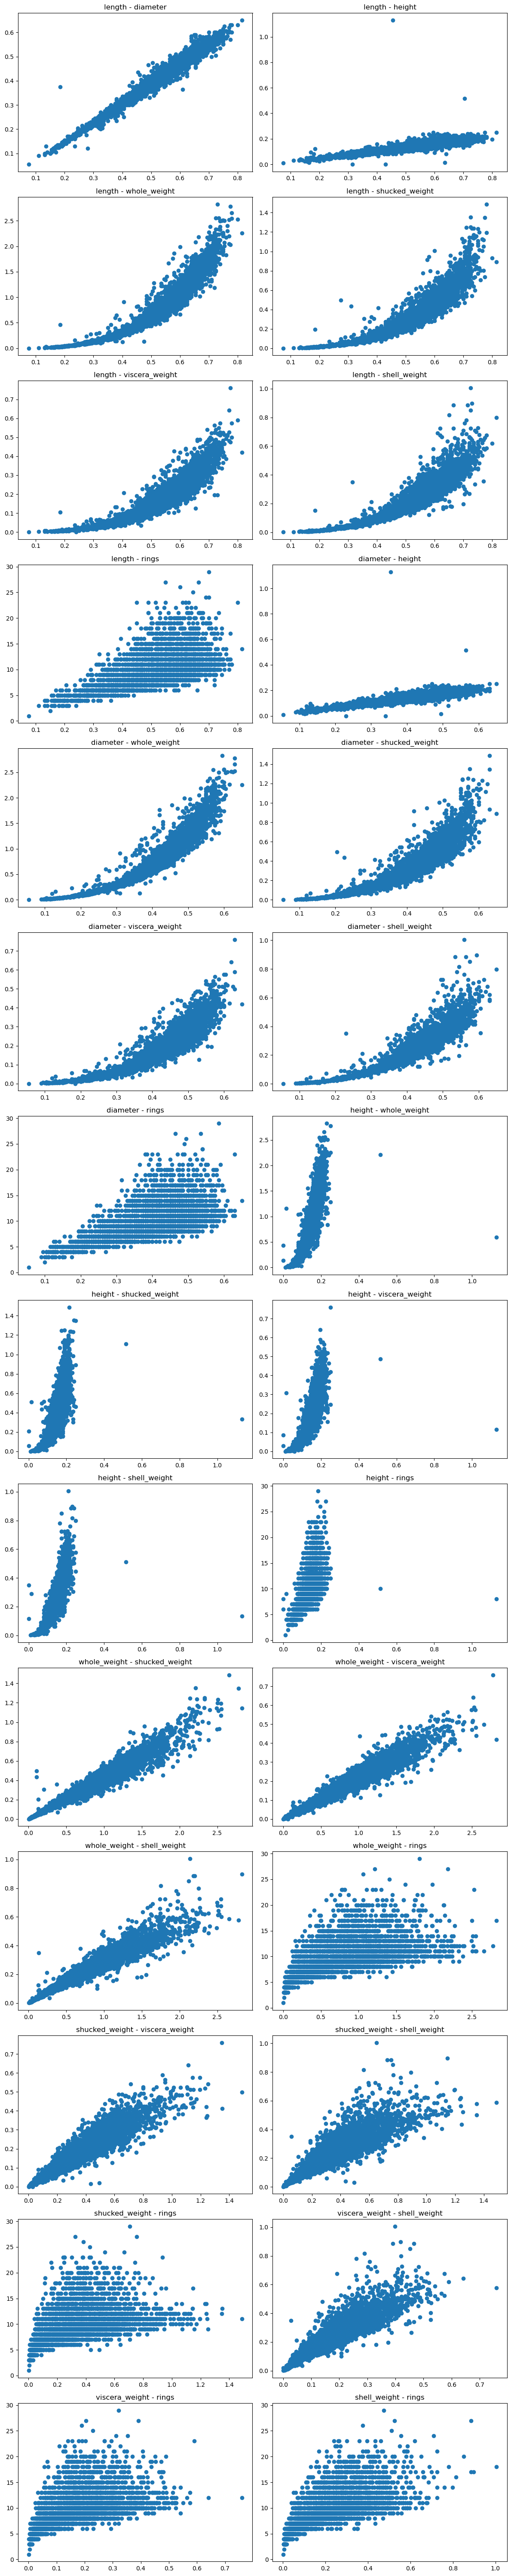

In [36]:
fig, axes = plt.subplots(14, 2, figsize=(12, 60))
fig.tight_layout()

# Add vertical spacing
plt.subplots_adjust(hspace=0.2)

index = 1
for x in range(1, len(dtype) - 1):
    for y in range(x + 1, len(dtype)):
        plt.subplot(14, 2, index)
        plt.scatter(data[dtype[x]], data[dtype[y]])
        plt.title(dtype[x] + " - " + dtype[y])
        index += 1
plt.tight_layout() # Adjust the padding between and around subplots
plt.show()

In [11]:
# Wyświetl macierz korelacji
correlation_matrix

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


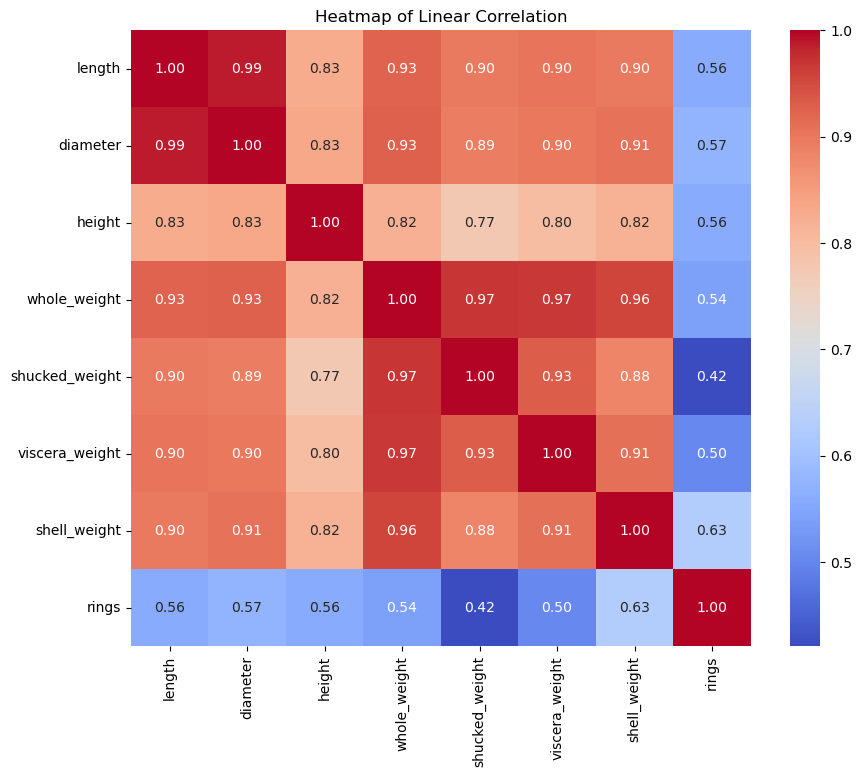

In [12]:

# Stwórz wykres cieplny
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Linear Correlation')
plt.show()

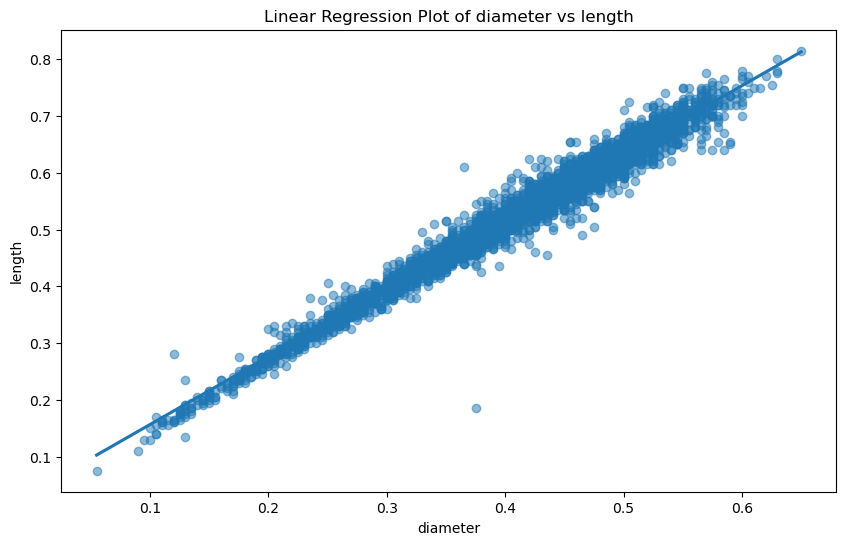

In [18]:
strongest_correlation = 
correlation_matrix.abs().unstack().sort_values(ascending=False)
strongest_correlation = 
strongest_correlation[strongest_correlation != 1].idxmax()

# Ustal zmienne na podstawie wyników powyższego kroku
x_variable = strongest_correlation[0]
y_variable = strongest_correlation[1]

# Stwórz wykres regresji liniowej
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x=x_variable, y=y_variable, scatter_kws={'alpha':0.5})
plt.title(f'Linear Regression Plot of {x_variable} vs {y_variable}')
plt.show()

In [10]:
summary_stats = []
grouped = df.groupby(qualitative_variable)
# Inicjalizuj słownik do mapowania kategorii
category_mapping = {'F': 'Female', 'I': 'Infant', 'M': 'Male'}


# Iteruj się przez zmienne ilościowe
for variable in quantitative_variables:
    for category, group in grouped:
        # Mapuj kategorie
        category_name = category_mapping.get(category, category)
        mean = group[variable].mean()
        std = group[variable].std()
        min_val = group[variable].min()
        q1 = group[variable].quantile(0.25)
        median = group[variable].median()
        q3 = group[variable].quantile(0.75)
        max_val = group[variable].max()

        # Dodaj wyniki do listy
        summary_stats.append([ category_name, mean, std, min_val,
                              q1, median, q3, max_val])
# Stwórz DataFrame z podsumowaniem statystyk
summary_df = pd.DataFrame(summary_stats, columns=[ 'Sex',
                                                   'mean', 'std', 'min', '25%',
                                                   '50%', '75%', 'max'])
summary_df.index = ['','Length','','', 'Diameter', '', '', 'Height','', '', 
                    'Whole weight','','','Shucked weight','',
                    '','Viscera weight','','','Shell weight','','','Rings','']
# Dodaj podpis do kolumny
summary_df.columns.name = 'Feature'
# Wyświetl podsumowanie
summary_df

Feature,Sex,mean,std,min,25%,50%,75%,max
,Female,0.579093,0.086160,0.2750,0.525000,0.59000,0.640000,0.8150
Length,Infant,0.427746,0.108858,0.0750,0.360000,0.43500,0.510000,0.7250
,Male,0.561391,0.102697,0.1550,0.505000,0.58000,0.630000,0.7800
,Female,0.454732,0.070954,0.1950,0.410000,0.46500,0.505000,0.6500
Diameter,Infant,0.326494,0.088109,0.0550,0.270000,0.33500,0.390000,0.5500
,Male,0.439287,0.084398,0.1100,0.395000,0.45500,0.500000,0.6300
,Female,0.158011,0.039984,0.0150,0.140000,0.16000,0.175000,1.1300
Height,Infant,0.107996,0.031995,0.0000,0.085000,0.11000,0.130000,0.2200
,Male,0.151381,0.034804,0.0250,0.130000,0.15500,0.175000,0.5150
,Female,1.046532,0.430316,0.0800,0.730000,1.03850,1.320250,2.6570


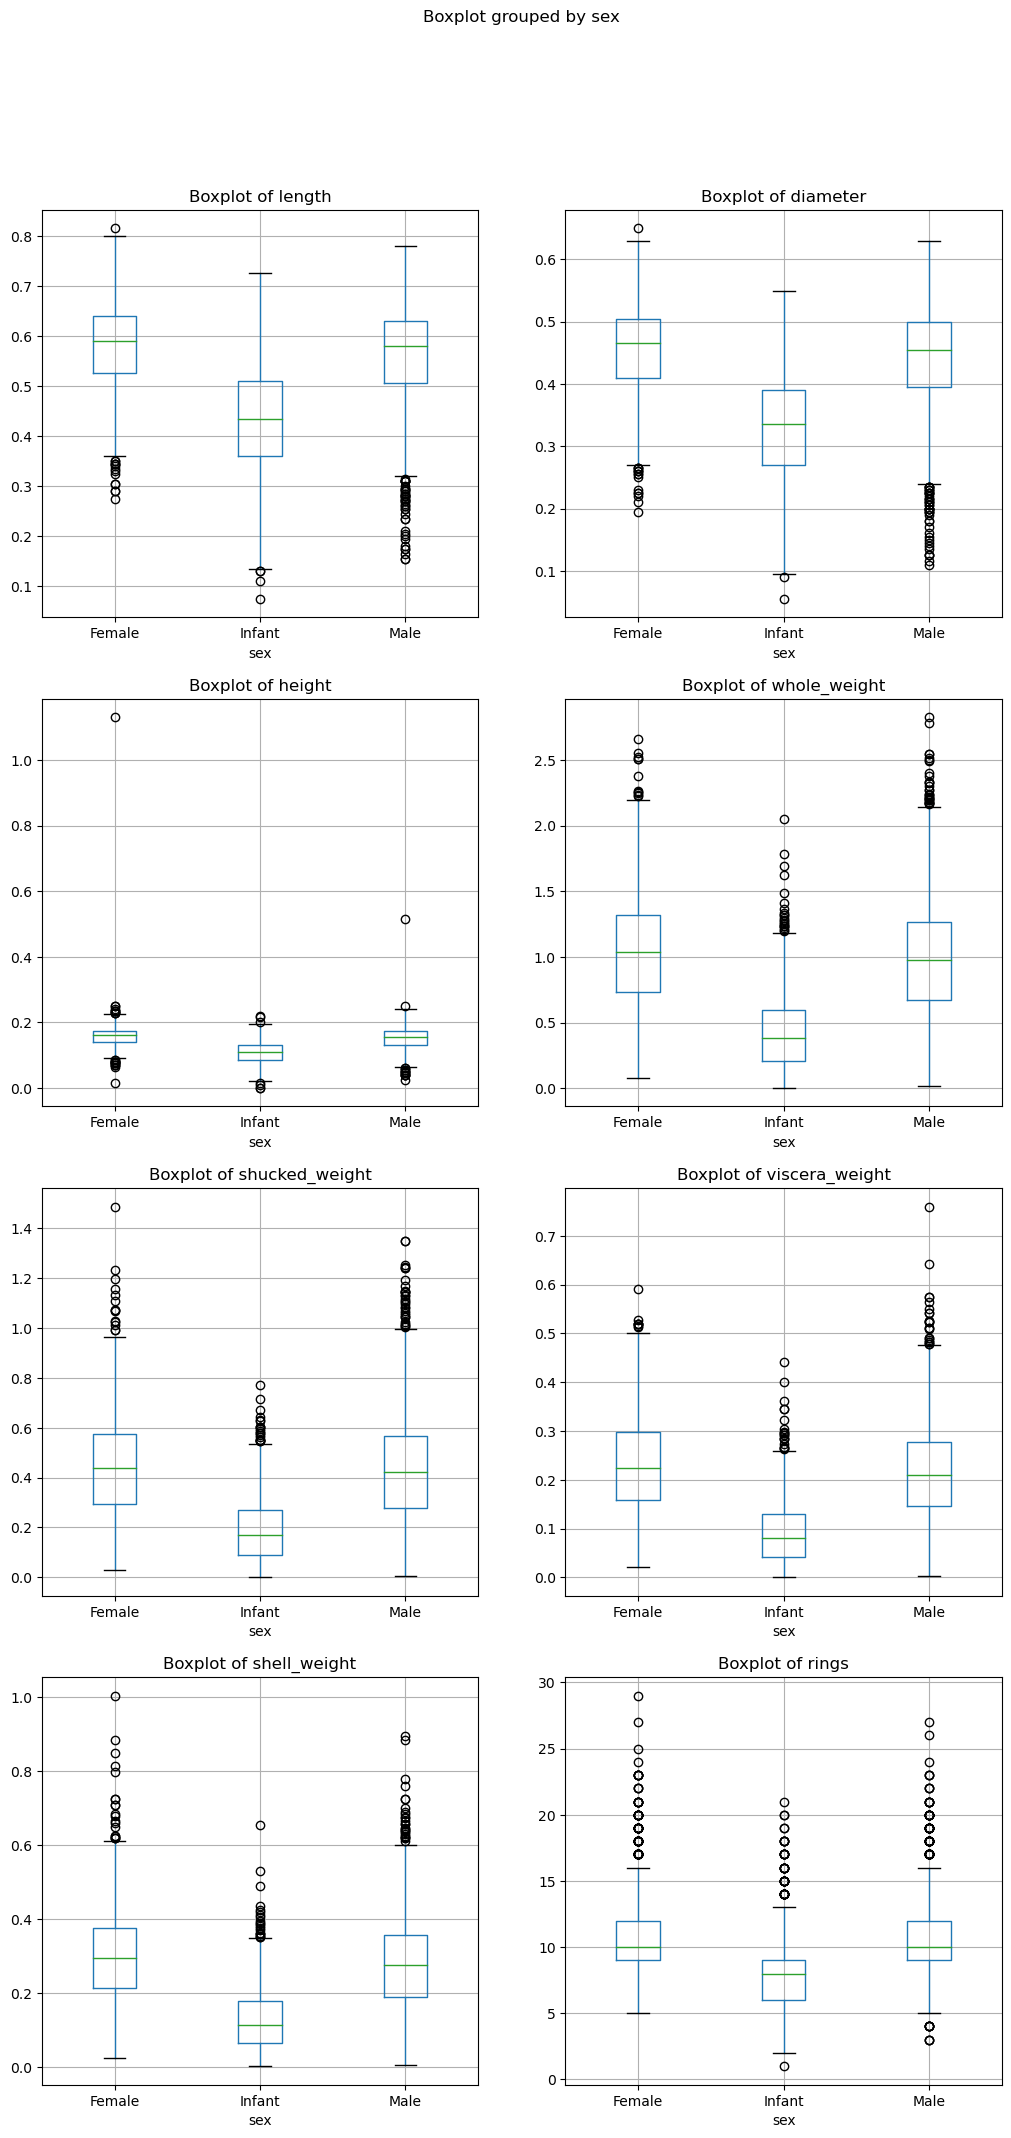

In [51]:
dfa = pd.DataFrame(data)
dfa[qualitative_variable] = dfa[qualitative_variable].map(category_mapping)
# Tworzenie subplotów (4 wiersze, 2 kolumny)
fig, axes = plt.subplots(4, 2, figsize=(12, 25))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2)  # Dodaj odstęp między subplotami
# Iteruj się przez zmienne ilościowe i twórz boxploty
for i, variable in enumerate(quantitative_variables):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Tworzenie boxplota
    dfa.boxplot(column=variable, by=qualitative_variable, ax=ax)
    
    # Ustaw tytuł i oznaczenia osi
    ax.set_title(f'Boxplot of {variable}')


# Wyświetl wykres
plt.show()